# thal2 1:2 Bifurcation Diagrams

# Inits

In [1]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
# user-defined
import nmCoupling as nm
# import nmCoupling_old as nm
import response as rp

import thal2 as t2

from lib.util import (get_phase, freq_est, get_tongue_1d, pl_exist_1d, 
                      get_period, bif1d, follow_phase_diffs, phase_lock_r3d,
                      follow_locking_3d)

from lib.rhs import _redu_c,_full
from lib.rhs import _redu_3dc_thal as _redu_3dc

from lib.plot_util import (add_diagram_1d_scatter, quick_plot_combined,
                           draw_full_solutions)

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym

from scipy.optimize import root,bisect
from copy import deepcopy
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

nmc = nm.nmCoupling
rsp = rp.Response

## Dicts

In [2]:
kw_sim = {'rtol':1e-7,'atol':1e-7,'method':'LSODA'}

In [3]:
pd1 = {'gL':0.05,'gna':3,'gk':5,
       'gt':5,'eL':-70,'ena':50,
       'ek':-90,'et':0,'esyn':-1,
       'c':1,'alpha':3,'beta':2,
       'sigmat':0.8,'vt':-20,
       'ib':3.5,'del':0,'om':1,'om_fix':1}

In [4]:
# default period must be 2*np.pi
kws1 = {'var_names':['v','h','r','w'],
        'pardict':pd1,
        'rhs':t2.rhs,
        'coupling':t2.coupling,
        'init':np.array([-.64,0.71,0.25,0,6]),
        'TN':20000,
        'trunc_order':3,
        'z_forward':False,
        'i_forward':[False,True,False,False,False,False],
        'i_bad_dx':[False,True,False,False,False,False],
        'max_iter':50,
        'rtol':1e-12,
        'atol':1e-12,
        'rel_tol':1e-9,
        'save_fig':False,
        'lc_prominence':.05,
        'factor':.5}

## Defs

In [5]:
kw_bif = {'method':'LSODA','dense_output':True,'rtol':1e-7,'atol':1e-7}

In [6]:
etup12 = (.001,.1,100)
eps_list12r = np.linspace(*etup12)

In [7]:
x_temp = np.linspace(-np.pi,3*np.pi,500)

## Initialize Response Functions

In [8]:
system1 = rsp(idx=0,model_name='thal0_35',**kws1)
system2 = rsp(idx=1,model_name='thal1_35',**kws1)

mkdir ./data/thal0_35/
* Loading LC data...
self.T 6.283185307179586 omfix 1.6947246128737048
* Loading monodromy...
* Floquet Exponent kappa =-0.03594482780785962
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...
mkdir ./data/thal1_35/
* Loading LC data...
self.T 6.283185307179586 omfix 1.6947246128737048
* Loading monodromy...
* Floquet Exponent kappa =-0.03594482780785962
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...


In [9]:
kw_nm = {'system1':system1,'system2':system2,'_n':('om0',1),'_m':('om1',2),
        'NH':1024,'save_fig':False}

# del=0.0

In [10]:
del12_p0 = 0
a12_p0 = nm.nmCoupling(**kw_nm, del1=del12_p0)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


In [11]:
print(a12_p0.system1.dtlc-a12_p0.system1.dtlc_endpt)

0.0


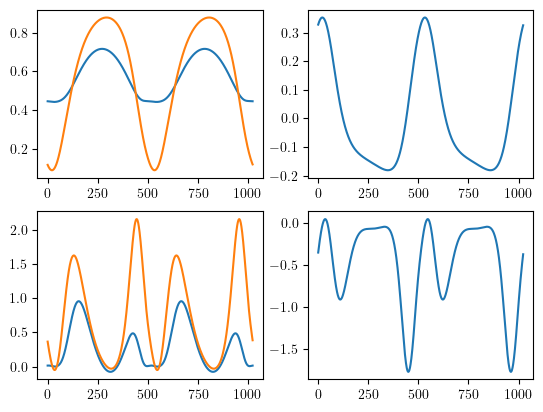

In [12]:
fig,axs = plt.subplots(2,2)
axs[0,0].plot(a12_p0.system1.h['dat'][0])
axs[0,0].plot(a12_p0.system2.h['dat'][0])

axs[0,1].plot(a12_p0.system1.h['dat'][0]-a12_p0.system2.h['dat'][0])

axs[1,0].plot(a12_p0.system1.h['dat'][1])
axs[1,0].plot(a12_p0.system2.h['dat'][1])

axs[1,1].plot(a12_p0.system1.h['dat'][1]-a12_p0.system2.h['dat'][1])

## Get Branches Full

In [ ]:
kw_p0 = {'a':a12_p0,'del1':del12_p0,'recompute':False,
         'bifdir':'bif1d_thal2/','_full_rhs':_full}

In [14]:
data_p0_list = []

In [15]:
in_dicts = [dict(init=1,eps_init=0.1,eps_final=0.009,deps=-.01),
           dict(init=1,eps_init=0.01,eps_final=0.0005,deps=-.001)]

In [16]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0)
    data_p0_list.append(dat)
fname = kw_p0['bifdir']+'hyper_thal2_12_p0.txt'

fname1 td_branch_init=1_nm=12_del=0_ei=0.1_ef=0.009_de=-0.01.txt
fname2 ts_branch_init=1_nm=12_del=0_ei=0.1_ef=0.009_de=-0.01.txt
init [-5.32818853e-02  2.54902691e-01  2.08969107e-01  4.36475080e-01 -5.20957261e-01  8.74532810e-01  2.57148032e-01  3.48512983e-07  5.97971613e+00]
eps iter 0 0.1                
t1,t2 0.6420152557998953 5.9788381682937475                             
t1,t2 3.767166547801486 5.9788381682937475
periods [5.97971117 3.12439838 2.85531145]
eps iter 1 0.09000000000000001                
t1,t2 0.6513274381537061 6.01120650791528                               
t1,t2 3.77793163698845 6.01120650791528
periods [6.00822941 3.126323   2.88190641]
eps iter 2 0.08000000000000002                
t1,t2 0.661333233520376 6.033637338693494                               
t1,t2 3.7882720770987937 6.033637338693494
periods [6.03706506 3.12820456 2.90886165]
eps iter 3 0.07000000000000002                
t1,t2 0.6714390551215484 6.062887066922912                              


In [17]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [18]:
data_r3d_p0_list = []

In [19]:
# find init for this branch mid
_,init = phase_lock_r3d([1,0,0],a12_p0,.1,_redu_3dc)
print(init)

t_diff 0.55692926077772882, Y=[ 0.55692926 -0.42220389  0.14731566]                                              
[ 0.5569 -0.4222  0.1473]


In [20]:
# b
dat = follow_locking_3d(init,a12_p0,(.1,.005,-.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

## Plot

eps_min 0.007000000000000003


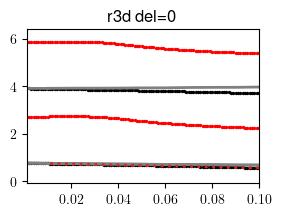

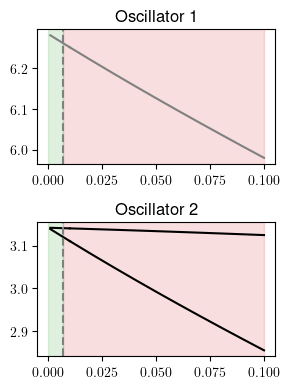

In [21]:
quick_plot_combined(a12_p0,
                    kw_f={'data_list':data_p0_list},
                    kw_r3d={'data_list':data_r3d_p0_list},
                    kw_r={'etup':etup12})

## Sims

In [22]:
eps12_p0 = 0.15
th_init12_p0 = 3

In [23]:
dt = .01;T_p0=500
t12_p0 = np.arange(0,T_p0,dt)
args12_p0 = {'args':(a12_p0,eps12_p0,del12_p0),
               't_eval':t12_p0,**kw_sim}

In [24]:
y0a = a12_p0.system1.lc['dat'][int((th_init12_p0/(2*np.pi)) * a12_p0.system1.TN),:]
y0b = a12_p0.system2.lc['dat'][int((0/(2*np.pi)) * a12_p0.system2.TN),:]

y0_p0 = np.array([y0a,y0b]).flatten()

solf12_p0 = solve_ivp(_full,[0,t12_p0[-1]],
                        y0_p0, **args12_p0)

In [25]:
solr12_p0 = solve_ivp(_redu_c,[0,t12_p0[-1]],
                        [th_init12_p0],**args12_p0)

In [26]:
# solr12b_p0 = solve_ivp(_redu_3dc,[0,t12_p0[-1]],
#                     [th_init12_p0,0,0],**args12_p0)

In [27]:
tp12a_p0, phase12a_p0 = get_phase(t12_p0,solf12_p0.y.T[:,:4],
                            skipn=50,system1=a12_p0.system1)
tp12b_p0, phase12b_p0 = get_phase(t12_p0,solf12_p0.y.T[:,4:],
                            skipn=50,system1=a12_p0.system2)

(-0.5, 6.783185307179586)

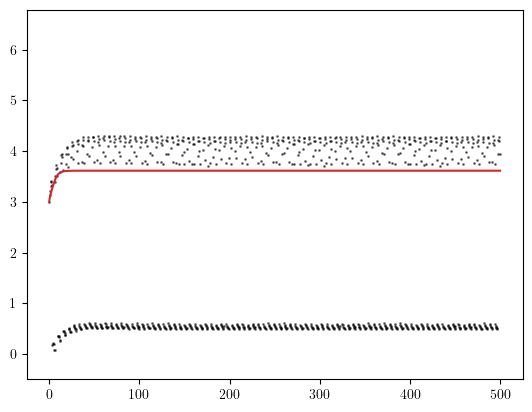

In [28]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p0 - a12_p0.om*phase12b_p0,2*np.pi)
axs.scatter(tp12a_p0,y,s=1,alpha=.5,color='black')

axs.plot(t12_p0,np.mod(solr12_p0.y.T,2*np.pi),color='tab:red')

# axs.plot(t12_p0*a12_p0.om,np.mod(solr12b_p0.y[0]-a12_p0.om*solr12b_p0.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

(250.0, 350.0)

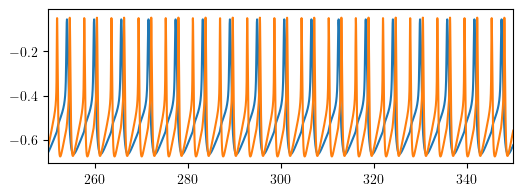

In [29]:
fig,axs = plt.subplots(figsize=(6,2))
axs.plot(solf12_p0.t,solf12_p0.y.T[:,0])
axs.plot(solf12_p0.t,solf12_p0.y.T[:,4])
axs.set_xlim(250,350)

# del=0.01

In [30]:
del12_p01 = .01
a12_p01 = nm.nmCoupling(**kw_nm, del1=1*del12_p01)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


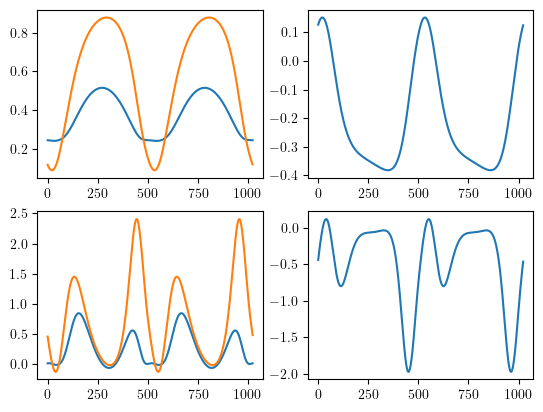

In [31]:
fig,axs = plt.subplots(2,2)
axs[0,0].plot(a12_p01.system1.h['dat'][0])
axs[0,0].plot(a12_p01.system2.h['dat'][0])

axs[0,1].plot(a12_p01.system1.h['dat'][0]-a12_p01.system2.h['dat'][0])

axs[1,0].plot(a12_p01.system1.h['dat'][1])
axs[1,0].plot(a12_p01.system2.h['dat'][1])

axs[1,1].plot(a12_p01.system1.h['dat'][1]-a12_p01.system2.h['dat'][1])

## Get Branches Full

In [32]:
kw_p01 = {'a':a12_p01,'del1':del12_p01,'bifdir':'bif1d_thal2/',
            '_full_rhs':_full,'recompute':False}

In [33]:
data_p01_list = []

In [34]:
in_dicts = [dict(init=2,eps_init=0.02,eps_final=0.0005,deps=-.002),
           dict(init=2,eps_init=0.02,eps_final=0.11,deps=.01),
           dict(init=0,eps_init=0.02,eps_final=0.0005,deps=-.001),
           dict(init=0,eps_init=0.02,eps_final=0.11,deps=.01)]

In [35]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p01)
    data_p01_list.append(dat)
fname = kw_p01['bifdir']+'hyper_thal2_12_p01.txt'

fname1 td_branch_init=2_nm=12_del=0.01_ei=0.02_ef=0.0005_de=-0.002.txt
fname2 ts_branch_init=2_nm=12_del=0.01_ei=0.02_ef=0.0005_de=-0.002.txt
init [-4.90945504e-02  2.56155652e-01  2.28179776e-01  4.38594705e-01 -4.71541044e-01  8.81668803e-01  2.41154002e-01  1.61922918e-08  6.25104102e+00]
eps iter 0 0.02                
t1,t2 0.4479125996093981 6.250741357936513                              
t1,t2 3.5872496784503123 6.250741357936513
periods [6.25103745 3.13747744 3.11356139]
eps iter 1 0.018000000000000002                
t1,t2 0.44765276883310473 6.253455752065254                             
t1,t2 3.5863310969210813 6.253455752065254
periods [6.25425292 3.13789706 3.11635586]
eps iter 2 0.016000000000000004                
t1,t2 0.451326924821375 6.255131712483968                               
t1,t2 3.5889863806182034 6.255131712483968
periods [6.25746723 3.13831769 3.11914932]
eps iter 3 0.014000000000000005                
t1,t2 0.4500543236989726 6.259296107863122            

In [36]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [37]:
data_r3d_p01_list = []

In [38]:
# find init for this branch
_,init = phase_lock_r3d([.5,0,0],a12_p01,.1,_redu_3dc)
print(init)

t_diff 0.40736609951429958, Y=[ 0.4073661  -0.10263904  0.01759158]                                              
[ 0.4074 -0.1026  0.0176]


In [39]:
# top 1b
dat = follow_locking_3d(init,a12_p01,(.1,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p01_list.append(dat)

## Plot

eps_min 0.016999999999999998


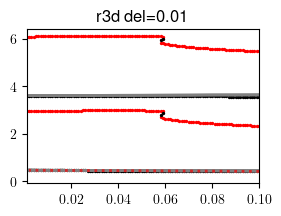

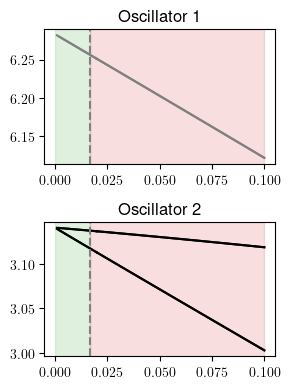

In [40]:
quick_plot_combined(a12_p01,
                    kw_f={'data_list':data_p01_list},
                    kw_r3d={'data_list':data_r3d_p01_list},
                    kw_r={'etup':etup12})

## Sims

In [41]:
eps12_p01 = 0.15
th_init12_p01 = 3

In [42]:
dt = .01;T_p01=500
t12_p01 = np.arange(0,T_p01,dt)
args12_p01 = {'args':(a12_p01,eps12_p01,del12_p01),
               't_eval':t12_p01,**kw_sim}

In [43]:
y0a = a12_p01.system1.lc['dat'][int((th_init12_p01/(2*np.pi)) * a12_p01.system1.TN),:]
y0b = a12_p01.system2.lc['dat'][int((0/(2*np.pi)) * a12_p01.system2.TN),:]

y0_p01 = np.array([y0a,y0b]).flatten()

solf12_p01 = solve_ivp(_full,[0,t12_p01[-1]],
                        y0_p01, **args12_p01)

In [44]:
solr12_p01 = solve_ivp(_redu_c,[0,t12_p01[-1]],
                        [th_init12_p01],**args12_p01)

In [45]:
# solr12b_p01 = solve_ivp(_redu_3dc,[0,t12_p01[-1]],
#                     [th_init12_p01,0,0],**args12_p01)

In [46]:
tp12a_p01, phase12a_p01 = get_phase(t12_p01,solf12_p01.y.T[:,:4],
                            skipn=50,system1=a12_p01.system1)
tp12b_p01, phase12b_p01 = get_phase(t12_p01,solf12_p01.y.T[:,4:],
                            skipn=50,system1=a12_p01.system2)

(-0.5, 6.783185307179586)

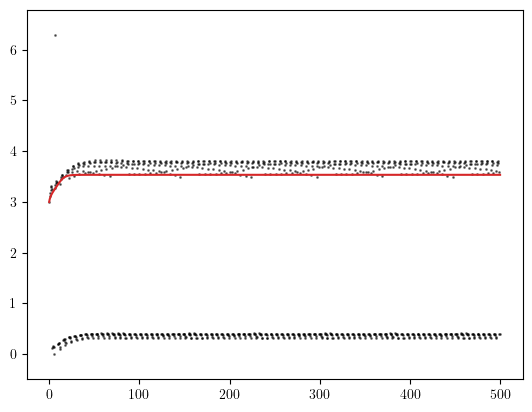

In [47]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p01 - a12_p01.om*phase12b_p01,2*np.pi)
axs.scatter(tp12a_p01,y,s=1,alpha=.5,color='black')

axs.plot(t12_p01,np.mod(solr12_p01.y.T,2*np.pi),color='tab:red')

# axs.plot(t12_p01*a12_p01.om,np.mod(solr12b_p01.y[0]-a12_p01.om*solr12b_p01.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

(250.0, 350.0)

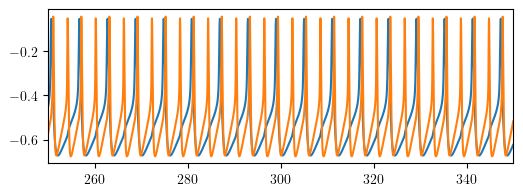

In [48]:
fig,axs = plt.subplots(figsize=(6,2))
axs.plot(solf12_p01.t,solf12_p01.y.T[:,0])
axs.plot(solf12_p01.t,solf12_p01.y.T[:,4])
axs.set_xlim(250,350)

# del=0.012

In [49]:
del12_p012 = .012
a12_p012 = nm.nmCoupling(**kw_nm, del1=1*del12_p012)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [50]:
kw_p012 = {'a':a12_p012,'del1':del12_p012,'bifdir':'bif1d_thal2/',
          '_full_rhs':_full,'recompute':False}

In [51]:
data_p012_list = []

In [52]:
in_dicts = [dict(init=2,eps_init=0.02,eps_final=0.0005,deps=-.001),
           dict(init=2,eps_init=0.02,eps_final=0.11,deps=.01)]

In [53]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p012)
    data_p012_list.append(dat)
fname = kw_p012['bifdir']+'hyper_thal2_12_p012.txt'

fname1 td_branch_init=2_nm=12_del=0.012_ei=0.02_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=2_nm=12_del=0.012_ei=0.02_ef=0.0005_de=-0.001.txt
init [-4.90184322e-02  2.56197837e-01  2.28874677e-01  4.38623586e-01 -4.62290941e-01  8.79388718e-01  2.39475130e-01  1.09445269e-08  6.25671599e+00]
eps iter 0 0.02                
t1,t2 0.3981036142974878 6.256195896548725                              
t1,t2 3.5332412338552843 6.256195896548725
periods [6.25671608 3.13696274 3.11975324]
eps iter 1 0.019                
t1,t2 0.3961965839087781 6.25621314836462                               
t1,t2 3.5343517156877975 6.25621314836462
periods [6.25804337 3.1372002  3.12084326]
eps iter 2 0.018                
t1,t2 0.39685236948639735 6.257318874984142                             
t1,t2 3.5343162883321555 6.257318874984142
periods [6.25936955 3.13743492 3.12193541]
eps iter 3 0.016999999999999998                
t1,t2 0.3978985891184291 6.261022748613583                              
t1,t2 3.53

In [54]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [55]:
data_r3d_p012_list = []

In [56]:
# find init for this branch
_,init = phase_lock_r3d([1.5,0,0],a12_p012,.05,_redu_3dc)
print(init)

t_diff 6.215097572438101-08, Y=[-6.35127304  0.02838208 -0.29859728]                                                          
[ 6.2151  0.0284 -0.2986]


t_diff 6.215097572438101
[ 6.2151  0.0284 -0.2986]


In [57]:
# top 1f
dat = follow_locking_3d(init,a12_p012,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p012_list.append(dat)

In [58]:
# top 1b
dat = follow_locking_3d(init,a12_p012,(.05,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p012_list.append(dat)

## Plot

eps_min 0.03


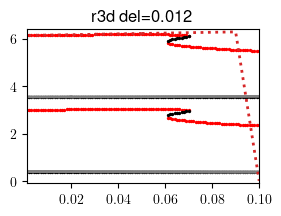

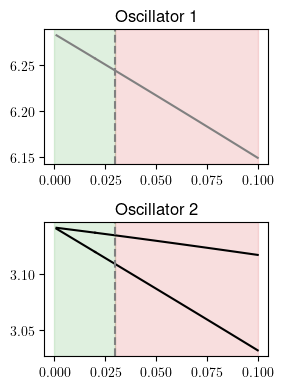

In [59]:
quick_plot_combined(a12_p012,
                    kw_f={'data_list':data_p012_list},
                    kw_r3d={'data_list':data_r3d_p012_list},
                    kw_r={'etup':etup12})

# del=0.013

In [60]:
del12_p013 = .013
a12_p013 = nm.nmCoupling(**kw_nm, del1=1*del12_p013)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [61]:
kw_p013 = {'a':a12_p013,'del1':del12_p013,'bifdir':'bif1d_thal2/',
          '_full_rhs':_full,'recompute':False}

In [62]:
data_p013_list = []

In [63]:
in_dicts = [dict(init=0,eps_init=0.02,eps_final=0.11,deps=.01),
           dict(init=0,eps_init=0.02,eps_final=0.0005,deps=-.001)]

In [64]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p013)
    data_p013_list.append(dat)
fname = kw_p013['bifdir']+'hyper_thal2_12_p013.txt'

fname1 td_branch_init=0_nm=12_del=0.013_ei=0.02_ef=0.11_de=0.01.txt
fname2 ts_branch_init=0_nm=12_del=0.013_ei=0.02_ef=0.11_de=0.01.txt
init [-4.89818751e-02  2.56203625e-01  2.29211604e-01  4.38649268e-01 -4.56883262e-01  8.77700934e-01  2.38560518e-01  8.89478277e-09  6.25950053e+00]
eps iter 0 0.02                
t1,t2 0.3683870713360415 6.258767897487855                              
t1,t2 3.50525066966703 6.258767897487855
periods [6.25950053 3.136627   3.12287654]
eps iter 1 0.03                
t1,t2 0.3687031480929738 6.247250021461458                              
t1,t2 3.4994233385701525 6.247250021461458
periods [6.24757456 3.13409026 3.11348218]
eps iter 2 0.039999999999999994                
t1,t2 0.3652445980869986 6.2353814081051135                             
t1,t2 3.496212356322389 6.2353814081051135
periods [6.23559295 3.13153386 3.10405889]
eps iter 3 0.049999999999999996                
t1,t2 0.36142780822994536 6.225994832093388                             
t1,t2

In [65]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [66]:
data_r3d_p013_list = []

In [67]:
# find init for this branch
_,init = phase_lock_r3d([1.5,0,0],a12_p013,.05,_redu_3dc)
print(init)

t_diff 3.09870543142633678, Y=[-3.18447988  0.03276173 -0.27505969]                                              
[ 3.0987  0.0328 -0.2751]


In [68]:
# top 1f
dat = follow_locking_3d(init,a12_p013,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p013_list.append(dat)

In [69]:
# top 1b
dat = follow_locking_3d(init,a12_p013,(.05,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p013_list.append(dat)

## Plot

eps_min 0.03


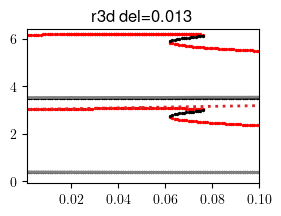

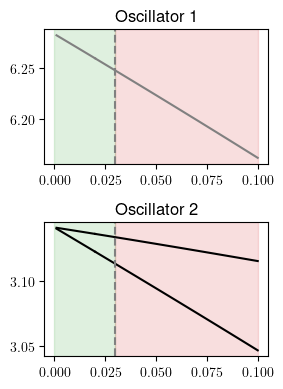

In [70]:
quick_plot_combined(a12_p013,
                    kw_f={'data_list':data_p013_list},
                    kw_r3d={'data_list':data_r3d_p013_list},
                    kw_r={'etup':etup12})

# del=0.014

In [71]:
del12_p014 = .014
a12_p014 = nm.nmCoupling(**kw_nm, del1=1*del12_p014)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [72]:
kw_p014 = {'a':a12_p014,'del1':del12_p014,'bifdir':'bif1d_thal2/',
          '_full_rhs':_full,'recompute':False}

In [73]:
data_p014_list = []

In [74]:
in_dicts = [dict(init=2,eps_init=0.1,eps_final=0.009,deps=-.01),
            dict(init=2,eps_init=0.01,eps_final=0.0005,deps=-.001)]

In [75]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p014)
    data_p014_list.append(dat)
fname = kw_p014['bifdir']+'hyper_thal2_12_p014.txt'

fname1 td_branch_init=2_nm=12_del=0.014_ei=0.1_ef=0.009_de=-0.01.txt
fname2 ts_branch_init=2_nm=12_del=0.014_ei=0.1_ef=0.009_de=-0.01.txt
init [-5.05765156e-02  2.56036546e-01  2.30896241e-01  4.37813694e-01 -4.54492874e-01  8.78066831e-01  2.35288878e-01  9.99495869e-09  6.17591931e+00]
eps iter 0 0.1                
t1,t2 0.3279850289360468 6.17666275746617                               
t1,t2 3.439722715223406 6.17666275746617
periods [6.17591931 3.11387309 3.06204622]
eps iter 1 0.09000000000000001                
t1,t2 0.32716359158283675 6.190124149071711                             
t1,t2 3.445512667147287 6.190124149071711
periods [6.18694875 3.11671112 3.07023754]
eps iter 2 0.08000000000000002                
t1,t2 0.3294378711274201 6.199759122308511                              
t1,t2 3.449503354909273 6.199759122308511
periods [6.19790873 3.11954655 3.07836218]
eps iter 3 0.07000000000000002                
t1,t2 0.32991897824938327 6.209128512194697                       

In [76]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [77]:
data_r3d_p014_list = []

In [78]:
# find init for this branch
_,init = phase_lock_r3d([1.5,0,0],a12_p014,.05,_redu_3dc)
print(init)

t_diff 3.49070299336789979, Y=[-2.79248231e+00 -8.01514710e-04 -2.74499560e-02]                                              
[ 3.4907e+00 -8.0000e-04 -2.7400e-02]


In [79]:
# top 1f
dat = follow_locking_3d(init,a12_p014,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p014_list.append(dat)

In [80]:
# top 1b
dat = follow_locking_3d(init,a12_p014,(.05,.001,-.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p014_list.append(dat)

## Plot

eps_min 0.040000000000000036


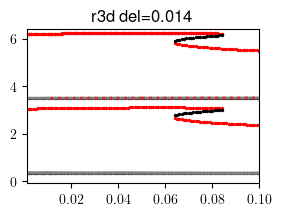

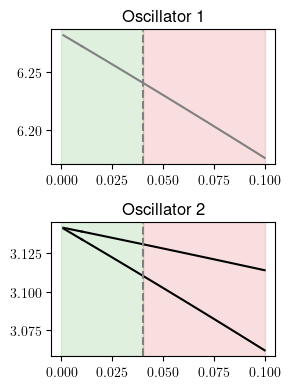

In [81]:
quick_plot_combined(a12_p014,
                    kw_f={'data_list':data_p014_list},
                    kw_r3d={'data_list':data_r3d_p014_list},
                    kw_r={'etup':etup12})

# del=0.015

In [82]:
del12_p015 = .015
a12_p015 = nm.nmCoupling(**kw_nm, del1=1*del12_p015)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [83]:
kw_p015 = {'a':a12_p015,'del1':del12_p015,'bifdir':'bif1d_thal2/',
          '_full_rhs':_full,'recompute':False}

In [84]:
data_p015_list = []

In [85]:
in_dicts = [dict(init=0,eps_init=0.02,eps_final=0.0005,deps=-.001),
            dict(init=0,eps_init=0.02,eps_final=0.11,deps=.01)]

In [86]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p015)
    data_p015_list.append(dat)
fname = kw_p015['bifdir']+'hyper_thal2_12_p015.txt'

fname1 td_branch_init=0_nm=12_del=0.015_ei=0.02_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=0_nm=12_del=0.015_ei=0.02_ef=0.0005_de=-0.001.txt
init [-4.89104834e-02  2.56234555e-01  2.29889862e-01  4.38683737e-01 -4.42656436e-01  8.72233300e-01  2.36425999e-01  5.56554823e-09  6.26498721e+00]
eps iter 0 0.02                
t1,t2 0.30570471311017283 6.266838818376393                             
t1,t2 3.4432976689487296 6.266838818376393
periods [6.26498319 3.13564096 3.12934221]
eps iter 1 0.019                
t1,t2 0.3086417965448129 6.265286983240415                              
t1,t2 3.4427586850095975 6.265286983240415
periods [6.2659018  3.13593872 3.12996394]
eps iter 2 0.018                
t1,t2 0.30723492351861464 6.264743142253146                             
t1,t2 3.4429437227571675 6.264743142253146
periods [6.26681535 3.13623756 3.13057782]
eps iter 3 0.016999999999999998                
t1,t2 0.30763144431602985 6.26692681715712                              
t1,t2 3.4

In [87]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [88]:
data_r3d_p015_list = []

In [89]:
# find init for this branch
_,init = phase_lock_r3d([.5,0,0],a12_p015,.1,_redu_3dc)
print(init)

t_diff 0.33679165106144004, Y=[ 0.33679165  0.02392637 -0.07980438]                                              
[ 0.3368  0.0239 -0.0798]


In [90]:
# top 1b
dat = follow_locking_3d(init,a12_p015,(.1,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p015_list.append(dat)

## Plot

eps_min 0.06999999999999999


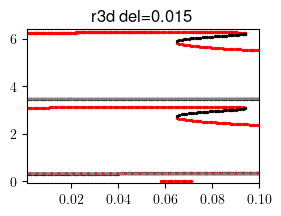

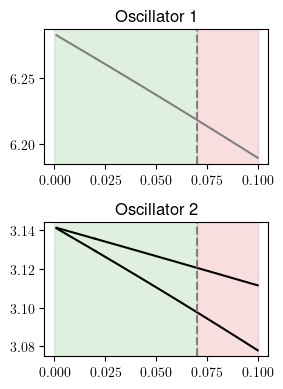

In [91]:
quick_plot_combined(a12_p015,
                    kw_f={'data_list':data_p015_list},
                    kw_r3d={'data_list':data_r3d_p015_list},
                    kw_r={'etup':etup12})

# del=0.016

In [92]:
del12_p016 = .016
a12_p016 = nm.nmCoupling(**kw_nm, del1=1*del12_p016)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [93]:
kw_p016 = {'a':a12_p016,'del1':del12_p016,'bifdir':'bif1d_thal2/',
          '_full_rhs':_full,'recompute':False}

In [94]:
data_p016_list = []

In [95]:
in_dicts = [dict(init=0,eps_init=0.02,eps_final=0.0005,deps=-.001),
            dict(init=0,eps_init=0.02,eps_final=0.11,deps=.01)]

In [96]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p016)
    data_p016_list.append(dat)
fname = kw_p016['bifdir']+'hyper_thal2_12_p016.txt'

fname1 td_branch_init=0_nm=12_del=0.016_ei=0.02_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=0_nm=12_del=0.016_ei=0.02_ef=0.0005_de=-0.001.txt
init [-4.88682878e-02  2.56264014e-01  2.30430128e-01  4.38694301e-01 -4.24242906e-01  8.63575248e-01  2.34223244e-01  3.53356389e-09  6.26770127e+00]
eps iter 0 0.02                
t1,t2 0.26591125803791177 6.2688779606459795                            
t1,t2 3.401557824761311 6.2688779606459795
periods [6.26768474 3.13484878 3.13283596]
eps iter 1 0.019                
t1,t2 0.26604127481385925 6.2655640905215755                            
t1,t2 3.401325042771837 6.2655640905215755
periods [6.26846645 3.13518477 3.13327943]
eps iter 2 0.018                
t1,t2 0.2661732483627017 6.2663031666461135                             
t1,t2 3.40178979107386 6.2663031666461135
periods [6.26924449 3.13551936 3.13372648]
eps iter 3 0.016999999999999998                
t1,t2 0.26630750983828566 6.267043654643517                             
t1,t2 3.40

In [97]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [98]:
data_r3d_p016_list = []

In [99]:
# find init for this branch
_,init = phase_lock_r3d([.5,0,0],a12_p016,.1,_redu_3dc)
print(init)

t_diff 0.31365131581111133, Y=[ 0.31365132  0.05050726 -0.11103297]                                              
[ 0.3137  0.0505 -0.111 ]


In [100]:
# top 1b
dat = follow_locking_3d(init,a12_p016,(.1,.001,-.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p016_list.append(dat)

## Plot

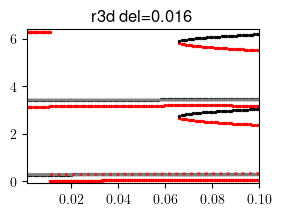

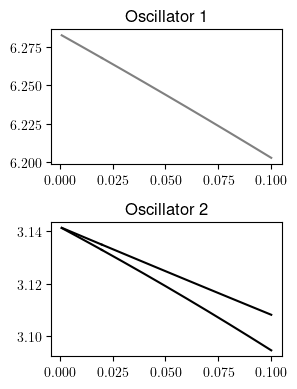

In [101]:
quick_plot_combined(a12_p016,
                    kw_f={'data_list':data_p016_list},
                    kw_r3d={'data_list':data_r3d_p016_list},
                    kw_r={'etup':etup12})

## Sims

In [102]:
eps12_p016 = 0.25
th_init12_p016 = 2.8

In [103]:
dt = .01;T_p016=500
t12_p016 = np.arange(0,T_p016,dt)
args12_p016 = {'args':(a12_p016,eps12_p016,del12_p016),
               't_eval':t12_p016,**kw_sim}

In [104]:
y0a = a12_p016.system1.lc['dat'][int((th_init12_p016/(2*np.pi)) * a12_p016.system1.TN),:]
y0b = a12_p016.system2.lc['dat'][int((0/(2*np.pi)) * a12_p016.system2.TN),:]

y0_p016 = np.array([y0a,y0b]).flatten()

solf12_p016 = solve_ivp(_full,[0,t12_p016[-1]],
                        y0_p016, **args12_p016)

In [105]:
solr12_p016 = solve_ivp(_redu_c,[0,t12_p016[-1]],
                        [th_init12_p016],**args12_p016)

In [106]:
# solr12b_p016 = solve_ivp(_redu_3dc,[0,t12_p016[-1]],
                    # [th_init12_p016,0,0],**args12_p016)

In [107]:
tp12a_p016, phase12a_p016 = get_phase(t12_p016,solf12_p016.y.T[:,:4],
                            skipn=50,system1=a12_p016.system1)
tp12b_p016, phase12b_p016 = get_phase(t12_p016,solf12_p016.y.T[:,4:],
                            skipn=50,system1=a12_p016.system2)

(-0.5, 6.783185307179586)

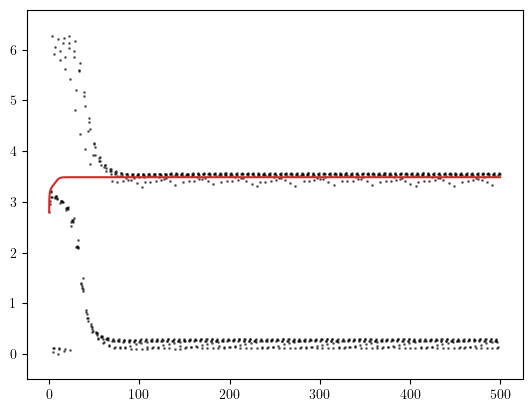

In [108]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p016 - a12_p016.om*phase12b_p016,2*np.pi)
axs.scatter(tp12a_p016,y,s=1,alpha=.5,color='black')

axs.plot(t12_p016,np.mod(solr12_p016.y.T,2*np.pi),color='tab:red')

# axs.plot(t12_p016*a12_p016.om,np.mod(solr12b_p016.y[0]-a12_p016.om*solr12b_p016.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.017

In [109]:
del12_p017 = .017
a12_p017 = nm.nmCoupling(**kw_nm, del1=1*del12_p017)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [110]:
kw_p017 = {'a':a12_p017,'del1':del12_p017,'bifdir':'bif1d_thal2/',
          '_full_rhs':_full,'recompute':False}

In [111]:
data_p017_list = []

In [112]:
in_dicts = [dict(init=0,eps_init=0.02,eps_final=0.0005,deps=-.001),
            dict(init=0,eps_init=0.02,eps_final=0.11,deps=.01)]

In [113]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p017)
    data_p017_list.append(dat)
fname = kw_p017['bifdir']+'hyper_thal2_12_p017.txt'

fname1 td_branch_init=0_nm=12_del=0.017_ei=0.02_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=0_nm=12_del=0.017_ei=0.02_ef=0.0005_de=-0.001.txt
init [-4.88407590e-02  2.56264966e-01  2.30607975e-01  4.38717351e-01 -4.13692296e-01  8.58113899e-01  2.33306269e-01  2.90837699e-09  6.27034040e+00]
eps iter 0 0.02                
t1,t2 0.2126789164502409 6.274045218345171                              
t1,t2 3.3461128131817612 6.274045218345171
periods [6.27033926 3.13348201 3.13685732]
eps iter 1 0.019                
t1,t2 0.21215262349804398 6.271466969498062                             
t1,t2 3.3451141047092667 6.271466969498062
periods [6.27098987 3.13388285 3.13710654]
eps iter 2 0.018                
t1,t2 0.21211864519356366 6.269568602688443                             
t1,t2 3.3469705882759366 6.269568602688443
periods [6.27163462 3.13428453 3.13734993]
eps iter 3 0.016999999999999998                
eps iter 4 0.015999999999999997                                          
t1,t2 0.

In [114]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [115]:
data_r3d_p017_list = []

In [116]:
# find init for this branch
_,init = phase_lock_r3d([.5,0,0],a12_p017,.1,_redu_3dc)
print(init)

t_diff 0.27674316050911240, Y=[ 0.27674316  0.08032496 -0.15982698]                                              
[ 0.2767  0.0803 -0.1598]


In [117]:
# top 1b
dat = follow_locking_3d(init,a12_p017,(.1,.001,-.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p017_list.append(dat)

## Plot

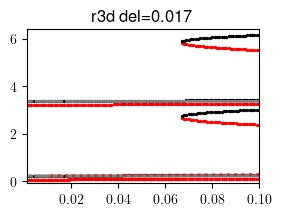

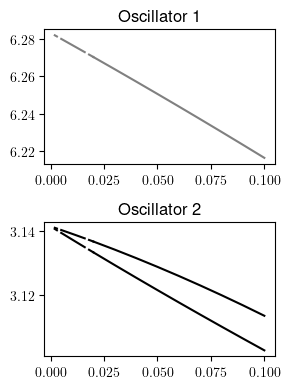

In [118]:
quick_plot_combined(a12_p017,
                    kw_f={'data_list':data_p017_list},
                    kw_r3d={'data_list':data_r3d_p017_list},
                    kw_r={'etup':etup12})

## Sims

In [119]:
eps12_p017 = 0.25
th_init12_p017 = 2.8

In [120]:
dt = .01;T_p017=500
t12_p017 = np.arange(0,T_p017,dt)
args12_p017 = {'args':(a12_p017,eps12_p017,del12_p017),
               't_eval':t12_p017,**kw_sim}

In [121]:
y0a = a12_p017.system1.lc['dat'][int((th_init12_p017/(2*np.pi)) * a12_p017.system1.TN),:]
y0b = a12_p017.system2.lc['dat'][int((0/(2*np.pi)) * a12_p017.system2.TN),:]

y0_p017 = np.array([y0a,y0b]).flatten()

solf12_p017 = solve_ivp(_full,[0,t12_p017[-1]],
                        y0_p017, **args12_p017)

In [122]:
solr12_p017 = solve_ivp(_redu_c,[0,t12_p017[-1]],
                        [th_init12_p017],**args12_p017)

In [123]:
# solr12b_p017 = solve_ivp(_redu_3dc,[0,t12_p017[-1]],
                    # [th_init12_p017,0,0],**args12_p017)

In [124]:
tp12a_p017, phase12a_p017 = get_phase(t12_p017,solf12_p017.y.T[:,:4],
                            skipn=50,system1=a12_p017.system1)
tp12b_p017, phase12b_p017 = get_phase(t12_p017,solf12_p017.y.T[:,4:],
                            skipn=50,system1=a12_p017.system2)

(-0.5, 6.783185307179586)

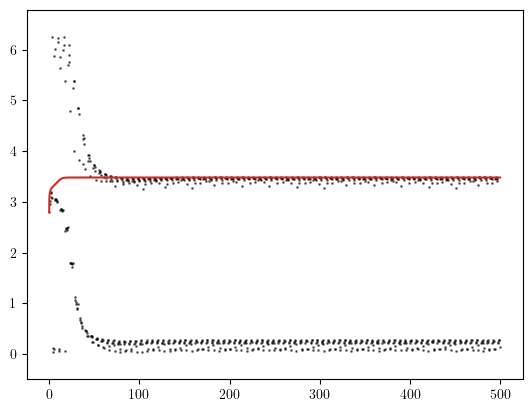

In [125]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p017 - a12_p017.om*phase12b_p017,2*np.pi)
axs.scatter(tp12a_p017,y,s=1,alpha=.5,color='black')

axs.plot(t12_p017,np.mod(solr12_p017.y.T,2*np.pi),color='tab:red')

# axs.plot(t12_p017*a12_p017.om,np.mod(solr12b_p017.y[0]-a12_p017.om*solr12b_p017.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.0175

In [126]:
del12_p0175 = .0175
a12_p0175 = nm.nmCoupling(**kw_nm, del1=1*del12_p0175)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [127]:
kw_p0175 = {'a':a12_p0175,'del1':del12_p0175,'bifdir':'bif1d_thal2/',
          '_full_rhs':_full,'recompute':False}

In [128]:
data_p0175_list = []

In [129]:
in_dicts = [dict(init=0,eps_init=0.1,eps_final=0.009,deps=-.01),
            dict(init=0,eps_init=0.01,eps_final=0.0005,deps=-.001)]

In [130]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0175)
    data_p0175_list.append(dat)
fname = kw_p0175['bifdir']+'hyper_thal2_12_p0175.txt'

fname1 td_branch_init=0_nm=12_del=0.0175_ei=0.1_ef=0.009_de=-0.01.txt
fname2 ts_branch_init=0_nm=12_del=0.0175_ei=0.1_ef=0.009_de=-0.01.txt
init [-5.00123734e-02  2.56278086e-01  2.36484792e-01  4.38096494e-01 -3.96200045e-01  8.50839881e-01  2.23438675e-01  2.41971415e-09  6.22326530e+00]
eps iter 0 0.1                
t1,t2 0.18025141142098253 6.226173759418036                             
t1,t2 3.276806333126235 6.226173759418036
periods [6.22325887 3.09792508 3.12533379]
eps iter 1 0.09000000000000001                
t1,t2 0.17914725841190698 6.231146161396635                             
t1,t2 3.2821430657629485 6.231146161396635
periods [6.22949858 3.10189267 3.12760603]
eps iter 2 0.08000000000000002                
t1,t2 0.1783041692120044 6.2351960238289825                             
t1,t2 3.2835493899336594 6.2351960238289825
periods [6.23567936 3.10592613 3.12975341]
eps iter 3 0.07000000000000002                
t1,t2 0.17737948432224718 6.243669175872992                 

In [131]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [132]:
data_r3d_p0175_list = []

In [133]:
# find init for this branch
_,init = phase_lock_r3d([.5,0,0],a12_p0175,.01,_redu_3dc)
print(init)

t_diff 0.15917378112921472, Y=[ 0.15917378  0.00966702 -0.02061862]                                              
[ 0.1592  0.0097 -0.0206]


In [134]:
# top 1f
dat = follow_locking_3d(init,a12_p0175,(.01,.04,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0175_list.append(dat)

In [135]:
# top 1b
dat = follow_locking_3d(init,a12_p0175,(.01,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0175_list.append(dat)

## Plot

eps_min 0.07000000000000002


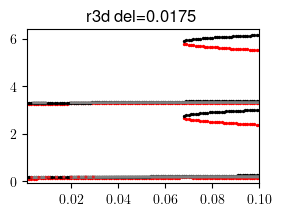

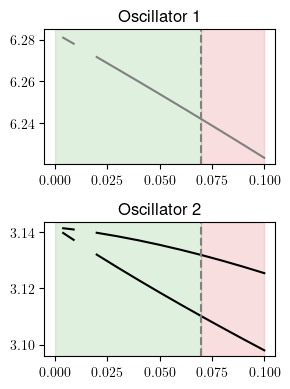

In [136]:
quick_plot_combined(a12_p0175,
                    kw_f={'data_list':data_p0175_list},
                    kw_r3d={'data_list':data_r3d_p0175_list},
                    kw_r={'etup':etup12})

## Sims

In [137]:
eps12_p0175 = 0.25
th_init12_p0175 = 3

In [138]:
dt = .01;T_p0175=1000
t12_p0175 = np.arange(0,T_p0175,dt)
args12_p0175 = {'args':(a12_p0175,eps12_p0175,del12_p0175),
               't_eval':t12_p0175,**kw_sim}

In [139]:
idx1 = int((th_init12_p0175/(2*np.pi)) * a12_p0175.system1.TN)
idx2 = int((0/(2*np.pi)) * a12_p0175.system2.TN)
y0a = a12_p0175.system1.lc['dat'][idx1,:]
y0b = a12_p0175.system2.lc['dat'][idx2,:]

y0_p0175 = np.array([y0a,y0b]).flatten()

solf12_p0175 = solve_ivp(_full,[0,t12_p0175[-1]],y0_p0175, **args12_p0175)

In [140]:
solr12_p0175 = solve_ivp(_redu_c,[0,t12_p0175[-1]],
                        [th_init12_p0175],**args12_p0175)

In [141]:
# solr12b_p0175 = solve_ivp(_redu_3dc,[0,t12_p0175[-1]],
#                     [th_init12_p0175,0,0],**args12_p0175)

In [142]:
tp12a_p0175, phase12a_p0175 = get_phase(t12_p0175,solf12_p0175.y.T[:,:4],
                            skipn=50,system1=a12_p0175.system1)
tp12b_p0175, phase12b_p0175 = get_phase(t12_p0175,solf12_p0175.y.T[:,4:],
                            skipn=50,system1=a12_p0175.system2)

(-0.5, 6.783185307179586)

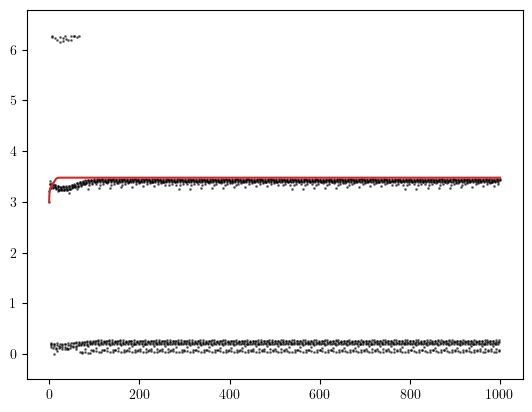

In [143]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p0175 - a12_p0175.om*phase12b_p0175,2*np.pi)
axs.scatter(tp12a_p0175,y,s=1,alpha=.5,color='black')

axs.plot(t12_p0175,np.mod(solr12_p0175.y.T,2*np.pi),color='tab:red')

# axs.plot(t12_p0175*a12_p0175.om,np.mod(solr12b_p0175.y[0]-a12_p0175.om*solr12b_p0175.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.01752

In [144]:
del12_p01752 = .01752
a12_p01752 = nm.nmCoupling(**kw_nm, del1=1*del12_p01752)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [149]:
kw_p01752 = {'a':a12_p01752,'del1':del12_p01752,'bifdir':'bif1d_thal2/',
          '_full_rhs':_full,'recompute':False}

In [150]:
data_p01752_list = []

In [151]:
in_dicts = [dict(init=0,eps_init=0.02,eps_final=0.081,deps=.01),
            dict(init=0,eps_init=0.02,eps_final=0.0005,deps=-.001)]

In [152]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p01752)
    data_p01752_list.append(dat)
fname = kw_p01752['bifdir']+'hyper_thal2_12_p01752.txt'

fname1 td_branch_init=0_nm=12_del=0.01752_ei=0.02_ef=0.081_de=0.01.txt
fname2 ts_branch_init=0_nm=12_del=0.01752_ei=0.02_ef=0.081_de=0.01.txt
init [-4.88236533e-02  2.56272681e-01  2.30814216e-01  4.38725472e-01 -3.93622589e-01  8.47160149e-01  2.31923873e-01  2.21744877e-09  6.27168010e+00]
eps iter 0 0.02                
t1,t2 0.15966980820889565 6.277426045625289                             
t1,t2 3.2927184315039275 6.277426045625289
periods [6.27165268 3.13181082 3.13984167]
eps iter 1 0.03                
t1,t2 0.16199535844838547 6.267993399282692                             
t1,t2 3.2893667756739537 6.267993399282692
periods [6.26582308 3.1271807  3.13864252]
eps iter 2 0.039999999999999994                
t1,t2 0.16490501507620403 6.258247417634688                             
t1,t2 3.288806257458688 6.258247417634688
periods [6.25993986 3.12267218 3.13726956]
eps iter 3 0.049999999999999996                
t1,t2 0.16699089071878986 6.25228269182306                             

In [153]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [154]:
data_r3d_p01752_list = []

In [155]:
# find init for this branch
_,init = phase_lock_r3d([.5,0,0],a12_p01752,.01,_redu_3dc)
print(init)

t_diff 0.15317503522739587, Y=[ 0.15317504  0.00979126 -0.02118884]                                              
[ 0.1532  0.0098 -0.0212]


In [156]:
# top 1f
dat = follow_locking_3d(init,a12_p01752,(.01,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p01752_list.append(dat)

In [157]:
# top 1b
dat = follow_locking_3d(init,a12_p01752,(.01,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p01752_list.append(dat)

## Plot

eps_min 0.06


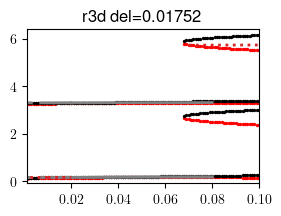

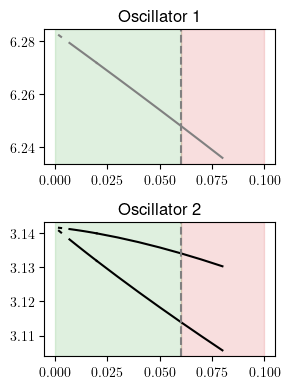

In [158]:
quick_plot_combined(a12_p01752,
                    kw_f={'data_list':data_p01752_list},
                    kw_r3d={'data_list':data_r3d_p01752_list},
                    kw_r={'etup':etup12})

## Sims

In [159]:
eps12_p01752 = 0.2
th_init12_p01752 = 3

In [160]:
dt = .01;T_p01752=1000
t12_p01752 = np.arange(0,T_p01752,dt)
args12_p01752 = {'args':(a12_p01752,eps12_p01752,del12_p01752),
               't_eval':t12_p01752,**kw_sim}

In [161]:
idx1 = int((th_init12_p01752/(2*np.pi)) * a12_p01752.system1.TN)
idx2 = int((0/(2*np.pi)) * a12_p01752.system2.TN)
y0a = a12_p01752.system1.lc['dat'][idx1,:]
y0b = a12_p01752.system2.lc['dat'][idx2,:]

y0_p01752 = np.array([y0a,y0b]).flatten()

solf12_p01752 = solve_ivp(_full,[0,t12_p01752[-1]],y0_p01752, **args12_p01752)

In [162]:
solr12_p01752 = solve_ivp(_redu_c,[0,t12_p01752[-1]],
                        [th_init12_p01752],**args12_p01752)

In [163]:
# solr12b_p01752 = solve_ivp(_redu_3dc,[0,t12_p01752[-1]],
#                     [th_init12_p01752,0,0],**args12_p01752)

In [164]:
tp12a_p01752, phase12a_p01752 = get_phase(t12_p01752,solf12_p01752.y.T[:,:4],
                            skipn=50,system1=a12_p01752.system1)
tp12b_p01752, phase12b_p01752 = get_phase(t12_p01752,solf12_p01752.y.T[:,4:],
                            skipn=50,system1=a12_p01752.system2)

(-0.5, 6.783185307179586)

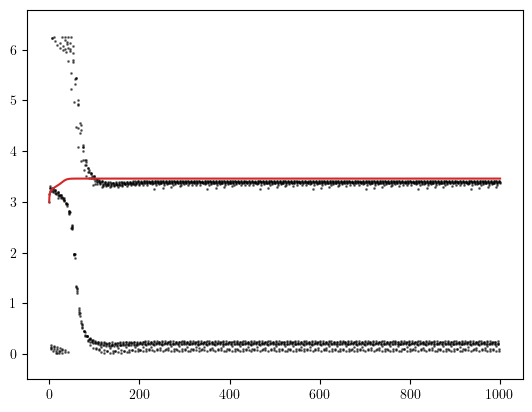

In [165]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p01752 - a12_p01752.om*phase12b_p01752,2*np.pi)
axs.scatter(tp12a_p01752,y,s=1,alpha=.5,color='black')

axs.plot(t12_p01752,np.mod(solr12_p01752.y.T,2*np.pi),color='tab:red')

# axs.plot(t12_p01752*a12_p01752.om,np.mod(solr12b_p01752.y[0]-a12_p01752.om*solr12b_p01752.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.01755

In [166]:
del12_p01755 = .01755
a12_p01755 = nm.nmCoupling(**kw_nm, del1=1*del12_p01755)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [167]:
kw_p01755 = {'a':a12_p01755,'del1':del12_p01755,'bifdir':'bif1d_thal2/',
          '_full_rhs':_full,'recompute':False}

In [168]:
data_p01755_list = []

In [169]:
in_dicts = [dict(init=0,eps_init=0.1,eps_final=0.009,deps=-.01),
            dict(init=0,eps_init=0.01,eps_final=0.0005,deps=-.001)]

In [170]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p01755)
    data_p01755_list.append(dat)
fname = kw_p01755['bifdir']+'hyper_thal2_12_p01755.txt'

fname1 td_branch_init=0_nm=12_del=0.01755_ei=0.1_ef=0.009_de=-0.01.txt
fname2 ts_branch_init=0_nm=12_del=0.01755_ei=0.1_ef=0.009_de=-0.01.txt
init [-5.00049767e-02  2.56293257e-01  2.36587277e-01  4.38090537e-01 -3.92808655e-01  8.48958197e-01  2.23036767e-01  2.31939625e-09  6.22392763e+00]
eps iter 0 0.1                
t1,t2 0.1759309672367821 6.226189524212792                              
t1,t2 3.2738296395280493 6.226189524212792
periods [6.22392763 3.09719696 3.12673067]
eps iter 1 0.09000000000000001                
t1,t2 0.17462513502950677 6.23028197697734                              
t1,t2 3.273410181784104 6.23028197697734
periods [6.23009503 3.10119222 3.12890288]
eps iter 2 0.08000000000000002                
t1,t2 0.17139680177284383 6.238086239344738                             
t1,t2 3.278926190707605 6.238086239344738
periods [6.23620309 3.10525125 3.13095101]
eps iter 3 0.07000000000000002                
t1,t2 0.16858919287680413 6.243666184383329                  

In [171]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [172]:
data_r3d_p01755_list = []

In [173]:
# find init for this branch
_,init = phase_lock_r3d([.5,0,0],a12_p01755,.01,_redu_3dc)
print(init)

[ 0.166   0.0097 -0.0199]02, Y=[ 0.16596409  0.00968643 -0.01990629]                                              


[ 0.166   0.0097 -0.0199]


In [174]:
# top 1f
dat = follow_locking_3d(init,a12_p01755,(.01,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p01755_list.append(dat)

In [175]:
# top 1b
dat = follow_locking_3d(init,a12_p01755,(.01,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p01755_list.append(dat)

## Plot

eps_min 0.060000000000000026


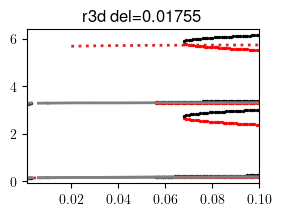

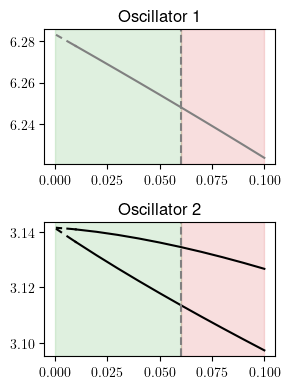

In [176]:
quick_plot_combined(a12_p01755,
                    kw_f={'data_list':data_p01755_list},
                    kw_r3d={'data_list':data_r3d_p01755_list},
                    kw_r={'etup':etup12})

## Sims

In [177]:
eps12_p01755 = 0.2
th_init12_p01755 = 3

In [178]:
dt = .01;T_p01755=1000
t12_p01755 = np.arange(0,T_p01755,dt)
args12_p01755 = {'args':(a12_p01755,eps12_p01755,del12_p01755),
               't_eval':t12_p01755,**kw_sim}

In [179]:
idx1 = int((th_init12_p01755/(2*np.pi)) * a12_p01755.system1.TN)
idx2 = int((0/(2*np.pi)) * a12_p01755.system2.TN)
y0a = a12_p01755.system1.lc['dat'][idx1,:]
y0b = a12_p01755.system2.lc['dat'][idx2,:]

y0_p01755 = np.array([y0a,y0b]).flatten()

solf12_p01755 = solve_ivp(_full,[0,t12_p01755[-1]],y0_p01755, **args12_p01755)

In [180]:
solr12_p01755 = solve_ivp(_redu_c,[0,t12_p01755[-1]],
                        [th_init12_p01755],**args12_p01755)

In [181]:
# solr12b_p01755 = solve_ivp(_redu_3dc,[0,t12_p01755[-1]],
#                     [th_init12_p01755,0,0],**args12_p01755)

In [182]:
tp12a_p01755, phase12a_p01755 = get_phase(t12_p01755,solf12_p01755.y.T[:,:4],
                            skipn=50,system1=a12_p01755.system1)
tp12b_p01755, phase12b_p01755 = get_phase(t12_p01755,solf12_p01755.y.T[:,4:],
                            skipn=50,system1=a12_p01755.system2)

(-0.5, 6.783185307179586)

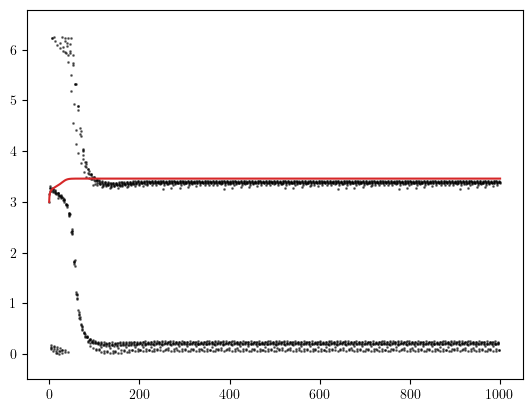

In [183]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p01755 - a12_p01755.om*phase12b_p01755,2*np.pi)
axs.scatter(tp12a_p01755,y,s=1,alpha=.5,color='black')

axs.plot(t12_p01755,np.mod(solr12_p01755.y.T,2*np.pi),color='tab:red')

# axs.plot(t12_p01755*a12_p01755.om,np.mod(solr12b_p01755.y[0]-a12_p01755.om*solr12b_p01755.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.0178

In [184]:
del12_p0178 = .0178
a12_p0178 = nm.nmCoupling(**kw_nm, del1=1*del12_p0178)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [185]:
kw_p0178 = {'a':a12_p0178,'del1':del12_p0178,'bifdir':'bif1d_thal2/',
          '_full_rhs':_full}

In [186]:
data_p0178_list = []

In [187]:
# # top 1b
# dat = follow_phase_diffs(init=0,eps_init=0.2,eps_final=0.31,
#                          deps=.01,**kw_p0178)
# data_p0178_list.append(dat)

t_diffs [-5.98347676 -5.98347676 -2.93479983] periods [6.15951141 3.05176133 3.10775192]
eps iter 2 0.22000000000000003                


t_diffs [-5.97767245 -5.97767245 -2.93188072] periods [6.15296634 3.04841442 3.10455192]
eps iter 3 0.23000000000000004                


t_diffs [-5.97354096 -5.97354096 -2.92840475] periods [6.14635133 3.04510774 3.10123882]
eps iter 4 0.24000000000000005                


t_diffs [-5.9636723  -5.9636723  -2.92356927] periods [6.13966151 3.04183597 3.09782555]
eps iter 5 0.25000000000000006                


t_diffs [-5.95712382 -5.95712382 -2.91976173] periods [6.13290244 3.03860696 3.0942979 ]
eps iter 6 0.26000000000000006                


t_diffs [-5.94980322 -5.94980322 -2.91477755] periods [6.12607046 3.03540223 3.09066823]
eps iter 7 0.2700000000000001                


t_diffs [-5.94167265 -5.94167265 -2.90967489] periods [6.11916744 3.0322397  3.08692675]
eps iter 8 0.2800000000000001                


t_diffs [-5.92771967 -5.92771967 -2.89957374] periods [6.11218476 3.02910953 3.08307498]
eps iter 9 0.2900000000000001                


t_diffs [-5.91937381 -5.91937381 -2.89383615] periods [6.10513113 3.02601315 3.07911414]
eps iter 10 0.3000000000000001                


t_diffs [-5.91089421 -5.91089421 -2.8891348 ] periods [6.09799564 3.02295101 3.07504467]


In [188]:
# # top 1f
# dat = follow_phase_diffs(init=0,eps_init=0.2,eps_final=0.09,
#                          deps=-.01,**kw_p0178)
# data_p0178_list.append(dat)

t_diffs [-6.00290901 -6.00290901 -2.94541831] periods [6.17240525 3.05857266 3.1138326 ]
eps iter 2 0.18                


t_diffs [-6.01258113 -6.01258113 -2.95107815] periods [6.17875053 3.06203465 3.11671588]
eps iter 3 0.16999999999999998                


t_diffs [-6.0195974 -6.0195974 -2.9556776] periods [6.18503047 3.06553826 3.11949221]
eps iter 4 0.15999999999999998                


t_diffs [-6.02725881 -6.02725881 -2.95821422] periods [6.19124608 3.06908216 3.12216268]
eps iter 5 0.14999999999999997                


t_diffs [-6.03971045 -6.03971045 -2.96924589] periods [6.19739778 3.07266879 3.12472899]
eps iter 6 0.13999999999999996                


t_diffs [-6.04615116 -6.04615116 -2.97020058] periods [6.20348688 3.07628124 3.12720453]
eps iter 7 0.12999999999999995                


t_diffs [-6.05576375 -6.05576375 -2.97655123] periods [6.20951431 3.07992021 3.1295941 ]
eps iter 8 0.11999999999999994                


t_diffs [-6.06686029 -6.06686029 -2.98360287] periods [6.21548058 3.0835673  3.13191607]
eps iter 9 0.10999999999999993                


t_diffs [-6.07611506 -6.07611506 -2.99220183] periods [6.22138772 3.08716432 3.13422327]
eps iter 10 0.09999999999999992                


t_diffs [-6.08953177 -6.08953177 -3.00250558] periods [6.22722499 3.09052947 3.13669047]
eps iter 11 0.08999999999999991                


## Get Branches 3D

In [189]:
data_r3d_p0178_list = []

In [190]:
# # find init for this branch
# _,init = phase_lock_r3d([.5,0,0],a12_p0178,.01,_redu_3dc)
# print(init)

In [191]:
# # top 1f
# dat = follow_locking_3d(init,a12_p0178,(.01,.04,.01),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p0178_list.append(dat)

In [192]:
# # top 1b
# dat = follow_locking_3d(init,a12_p0178,(.01,.001,-.001),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p0178_list.append(dat)

## Plot

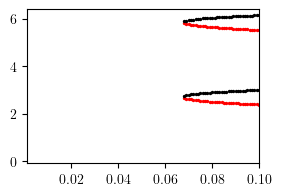

In [193]:
quick_plot_combined(a12_p0178,
                    #kw_f={'data_list':data_p0178_list},
                    #kw_r3d={'data_list':data_r3d_p0178_list},
                    kw_r={'etup':etup12})

## Sims

In [201]:
eps12_p0178 = 0.05
th_init12_p0178 = 0

In [202]:
dt = .01;T_p0178=1000
t12_p0178 = np.arange(0,T_p0178,dt)
args12_p0178 = {'args':(a12_p0178,eps12_p0178,del12_p0178),
               't_eval':t12_p0178,**kw_sim}

In [203]:
idx1 = int((th_init12_p0178/(2*np.pi)) * a12_p0178.system1.TN)
idx2 = int((0/(2*np.pi)) * a12_p0178.system2.TN)
y0a = a12_p0178.system1.lc['dat'][idx1,:]
y0b = a12_p0178.system2.lc['dat'][idx2,:]

y0_p0178 = np.array([y0a,y0b]).flatten()

solf12_p0178 = solve_ivp(_full,[0,t12_p0178[-1]],y0_p0178, **args12_p0178)

In [204]:
solr12_p0178 = solve_ivp(_redu_c,[0,t12_p0178[-1]],
                        [th_init12_p0178],**args12_p0178)

In [205]:
# solr12b_p0178 = solve_ivp(_redu_3dc,[0,t12_p0178[-1]],
#                     [th_init12_p0178,0,0],**args12_p0178)

In [206]:
tp12a_p0178, phase12a_p0178 = get_phase(t12_p0178,solf12_p0178.y.T[:,:4],
                            skipn=50,system1=a12_p0178.system1)
tp12b_p0178, phase12b_p0178 = get_phase(t12_p0178,solf12_p0178.y.T[:,4:],
                            skipn=50,system1=a12_p0178.system2)

(-0.5, 6.783185307179586)

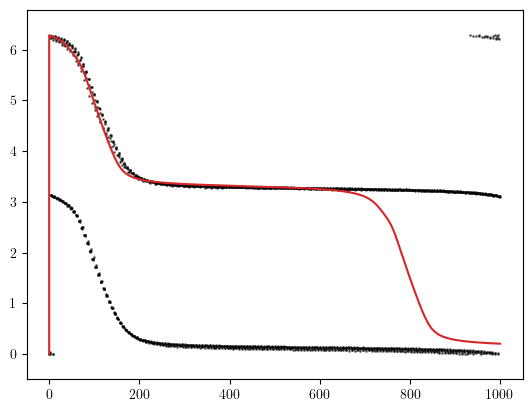

In [207]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p0178 - a12_p0178.om*phase12b_p0178,2*np.pi)
axs.scatter(tp12a_p0178,y,s=1,alpha=.5,color='black')

axs.plot(t12_p0178,np.mod(solr12_p0178.y.T,2*np.pi),color='tab:red')

# axs.plot(t12_p0178*a12_p0178.om,np.mod(solr12b_p0178.y[0]-a12_p0178.om*solr12b_p0178.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)